In [1]:
%matplotlib inline

# Imports

In [2]:
import time
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Get Data

In [4]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [5]:
random_state = check_random_state(0)

X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000)

# Inspect Data

In [6]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X_train.shape

(5000, 784)

In [8]:
X_train[0, :].shape

(784,)

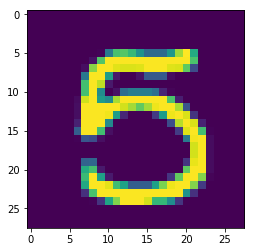

In [9]:
num = X_train[6,:].reshape(28,28)
plt.imshow(num)

# Preprocessing

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training Loop!

In [11]:
# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50. / train_samples,
                         multi_class='multinomial',
                         penalty='l1', solver='saga', tol=0.1)

clf.fit(X_train, y_train)


sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

Sparsity with L1 penalty: 77.42%
Test score with L1 penalty: 0.8257


# Let's test it! 

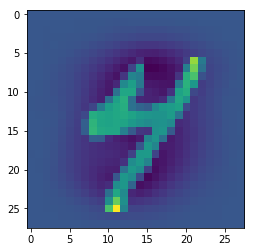

In [12]:
sample = X_test[56,: ]
plt.imshow(sample.reshape(28,28))

In [13]:
clf.predict(sample[np.newaxis,:])

array(['4'], dtype=object)

In [14]:
clf.predict_proba(sample[np.newaxis,:])

array([[0.03050988, 0.03365259, 0.01650146, 0.05771584, 0.34199461,
        0.12459439, 0.0582031 , 0.05710215, 0.09321575, 0.18651022]])

Probability of 4 is also significant. 

# Understanding what it sees

In [15]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
coef.shape

(10, 784)

<Figure size 720x360 with 0 Axes>

Text(0.5, 0.98, 'Classification vector for...')

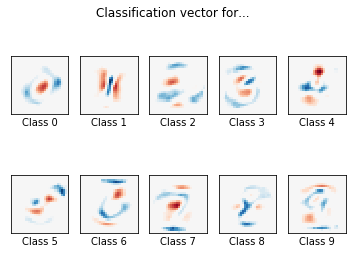

In [16]:
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

In [17]:
run_time = time.time() - t0
print('Example run in %.3f s' % run_time)


Example run in 69.556 s
